# Téléchargement de données ERA5-Land pour le Puy-de-Dôme (2000-2007)

Ce notebook utilise l'API **Copernicus Climate Data Store (CDS)** pour télécharger des données climatiques ERA5-Land pour le **Puy-de-Dôme**, sur la période **2000-2007**.

---

## Colonnes / Variables de température récupérées

- **2m dewpoint temperature**  
- **2m temperature**  
- **Skin temperature**  
- **Soil temperature level 1**  
- **Soil temperature level 2**  
- **Soil temperature level 3**  
- **Soil temperature level 4**

---

## Période et fréquence

- Années : **2000 à 2007**  
- Données par **mois**  
- Données par **heure** (00:00 à 23:00)

---

## Zone géographique

- **Puy-de-Dôme** (coordonnées approximatives) :  
  - Latitude : 45.7° N  
  - Longitude : 3.1° E  
   (Wiki-Puy-de-Dome)

---

## Format et téléchargement

- Format de sortie : **NetCDF4 (Experimental)**  
- Téléchargement effectué via **CDS API request**  

> Pour plus d’informations sur l’utilisation de l’API, veuillez consulter la documentation officielle : [CDS API Documentation](https://cds.climate.copernicus.eu/api-how-to)


In [5]:
import cdsapi


### API Request code to download the dataset


```python
import cdsapi

dataset = "reanalysis-era5-land-monthly-means"

request = {
    "product_type": [
        "monthly_averaged_reanalysis",
        "monthly_averaged_reanalysis_by_hour_of_day"
    ],
    "variable": [
        "2m_dewpoint_temperature",
        "2m_temperature",
        "skin_temperature",
        "soil_temperature_level_1",
        "soil_temperature_level_2",
        "soil_temperature_level_3",
        "soil_temperature_level_4"
    ],
    "year": [
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "zip",
    "area": [45.7, 3.1, 45.6, 3.2]
}

client = cdsapi.Client(
    url="https://cds.climate.copernicus.eu/api",
    key="2e6ea876-1612-49b0-babe-4509b8eef269",
    verify=True
)

client.retrieve(dataset, request).download()


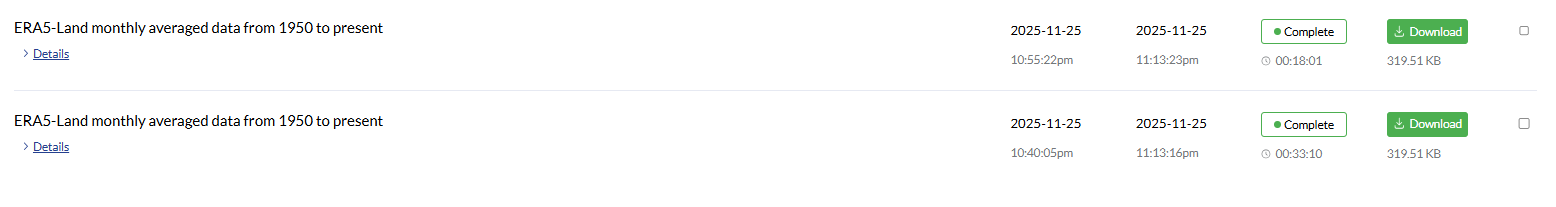

## Besoin d'installer une librairies : 

```python
pip install netcdf4


In [6]:
import xarray as xr

# Charger les fichiers NetCDF
ds_mnth = xr.open_dataset("../bdd_temperature/data_stream-mnth.nc")
ds_moda = xr.open_dataset("../bdd_temperature/data_stream-moda.nc")

# Fonction pour afficher les infos principales
def print_dataset_info(ds, name):
    print(f"--- {name} dataset ---\n")
    
    # Variables disponibles
    print("Variables disponibles :")
    for var in ds.data_vars:
        print(f"  - {var} : dimensions {ds[var].dims}, shape {ds[var].shape}")
    
    # Dimensions
    print("\nDimensions :")
    for dim, size in ds.sizes.items():  # Utiliser .sizes pour éviter le warning
        print(f"  - {dim} : {size}")
    
    # Aperçu des données (5 premiers éléments le long de la dimension temporelle si possible)
    print("\nAperçu des données (5 premiers éléments) :")
    for var in ds.data_vars:
        print(f"\nVariable '{var}':")
        
        # Identifier automatiquement la dimension temporelle
        time_dim = None
        for dim in ds[var].dims:
            if 'time' in dim.lower():  # Cherche un nom contenant "time"
                time_dim = dim
                break
        
        if time_dim:
            print(ds[var].isel({time_dim: slice(0, 5)}))
        else:
            print("Pas de dimension temporelle détectée, affichage complet :")
            print(ds[var])
    
    print("\n" + "-"*50 + "\n")

# Afficher les infos des deux datasets
print_dataset_info(ds_mnth, "MNTH")

--- MNTH dataset ---

Variables disponibles :
  - d2m : dimensions ('valid_time', 'latitude', 'longitude'), shape (2304, 2, 2)
  - t2m : dimensions ('valid_time', 'latitude', 'longitude'), shape (2304, 2, 2)

Dimensions :
  - valid_time : 2304
  - latitude : 2
  - longitude : 2

Aperçu des données (5 premiers éléments) :

Variable 'd2m':
<xarray.DataArray 'd2m' (valid_time: 5, latitude: 2, longitude: 2)> Size: 80B
[20 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 40B 2000-01-01T01:00:00 ... 2000-...
  * latitude    (latitude) float64 16B 45.7 45.6
  * longitude   (longitude) float64 16B 3.1 3.2
    expver      (valid_time) <U4 80B ...
Attributes: (12/31)
    GRIB_paramId:                             168
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      4
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_gridType:   

In [7]:
print_dataset_info(ds_moda, "MODA")


--- MODA dataset ---

Variables disponibles :
  - d2m : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)
  - t2m : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)
  - skt : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)
  - stl1 : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)
  - stl2 : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)
  - stl3 : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)
  - stl4 : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)

Dimensions :
  - valid_time : 96
  - latitude : 2
  - longitude : 2

Aperçu des données (5 premiers éléments) :

Variable 'd2m':
<xarray.DataArray 'd2m' (valid_time: 5, latitude: 2, longitude: 2)> Size: 80B
[20 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 40B 2000-01-01 ... 2000-05-01
  * latitude    (latitude) float64 16B 45.

In [8]:
ds_moda.dims

FrozenMappingWarningOnValuesAccess({'valid_time': 96, 'latitude': 2, 'longitude': 2})

In [9]:
ds_mnth

<xarray.Dataset> Size: 129kB
Dimensions:     (valid_time: 2304, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 18kB 2000-01-01T01:00:00 ... 2007...
  * latitude    (latitude) float64 16B 45.7 45.6
  * longitude   (longitude) float64 16B 3.1 3.2
    expver      (valid_time) <U4 37kB ...
Data variables:
    d2m         (valid_time, latitude, longitude) float32 37kB ...
    t2m         (valid_time, latitude, longitude) float32 37kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-25T22:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [10]:
ds_moda

<xarray.Dataset> Size: 13kB
Dimensions:     (valid_time: 96, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 768B 2000-01-01 ... 2007-12-01
  * latitude    (latitude) float64 16B 45.7 45.6
  * longitude   (longitude) float64 16B 3.1 3.2
    expver      (valid_time) <U4 2kB ...
Data variables:
    d2m         (valid_time, latitude, longitude) float32 2kB ...
    t2m         (valid_time, latitude, longitude) float32 2kB ...
    skt         (valid_time, latitude, longitude) float32 2kB ...
    stl1        (valid_time, latitude, longitude) float32 2kB ...
    stl2        (valid_time, latitude, longitude) float32 2kB ...
    stl3        (valid_time, latitude, longitude) float32 2kB ...
    stl4        (valid_time, latitude, longitude) float32 2kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-25T22:12 GRIB to CDM+CF via cfgrib-0.9.1...

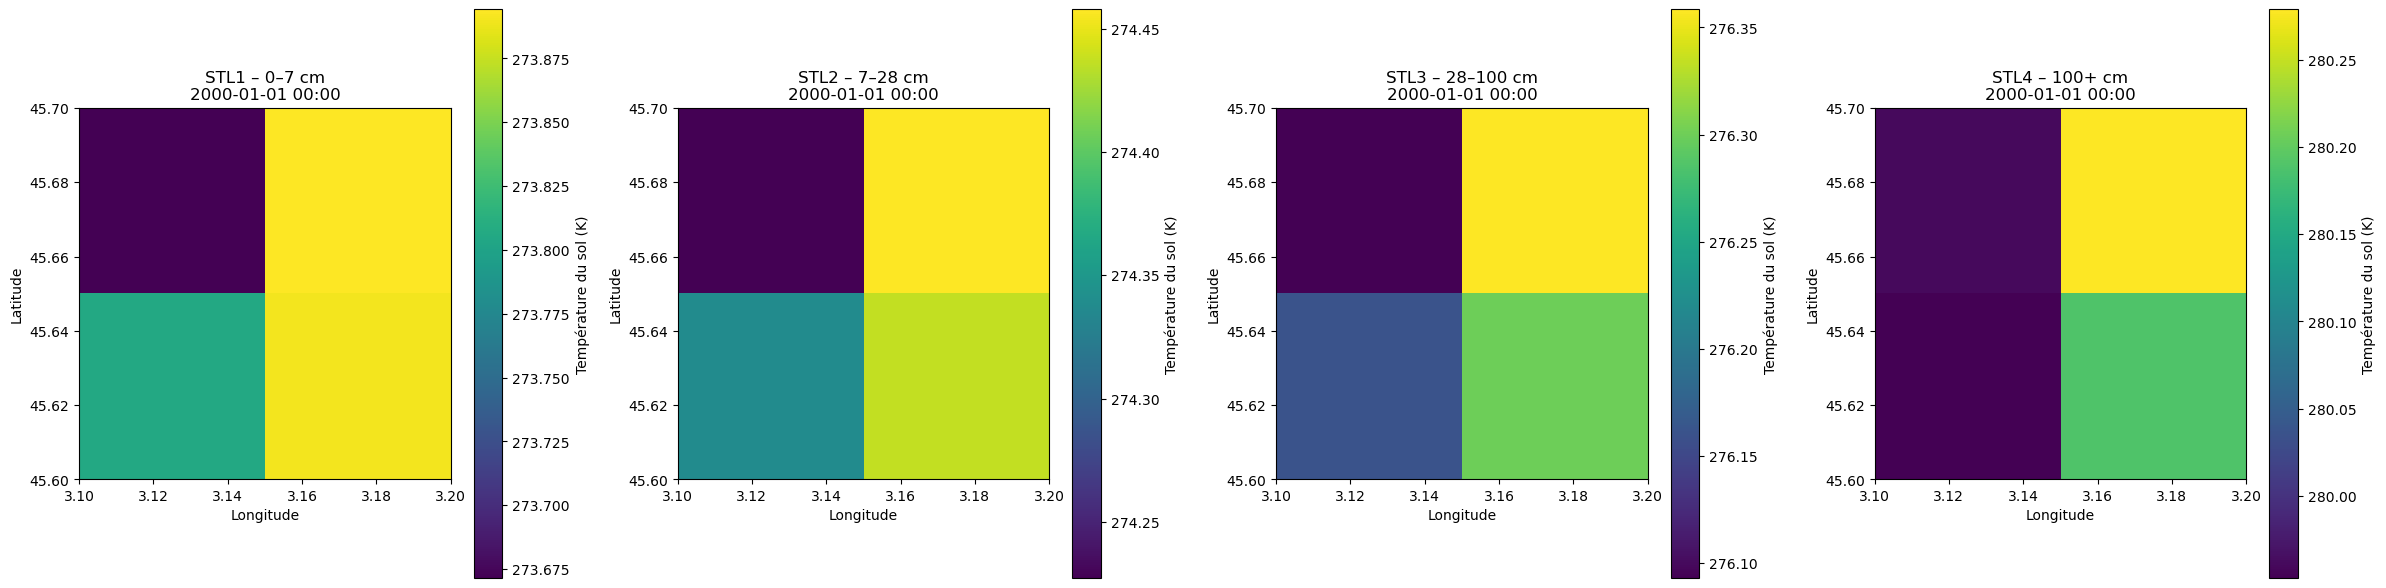

In [11]:
import matplotlib.pyplot as plt

# Choisir un pas de temps
time_index = 0  # pas de temps en heure, ça commence à 0h00 le 1er janvier 2000

variables = [ds_moda.stl1, ds_moda.stl2, ds_moda.stl3, ds_moda.stl4]
titles = [
    "STL1 – 0–7 cm",
    "STL2 – 7–28 cm",
    "STL3 – 28–100 cm",
    "STL4 – 100+ cm"
]

lon = ds_moda.longitude
lat = ds_moda.latitude

# Formatage de la date : année-mois-jour-heure
date_str = ds_moda.valid_time[time_index].dt.strftime("%Y-%m-%d %H:%M").item()

plt.figure(figsize=(24, 6))

for i, (var, title) in enumerate(zip(variables, titles)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(
        var.isel(valid_time=time_index),
        cmap="viridis",
        origin="upper",
        extent=[float(lon.min()), float(lon.max()), float(lat.min()), float(lat.max())]
    )
    
    plt.title(f"{title}\n{date_str}")
    
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    
    cbar = plt.colorbar()
    cbar.set_label("Température du sol (K)")

plt.tight_layout()
plt.show()


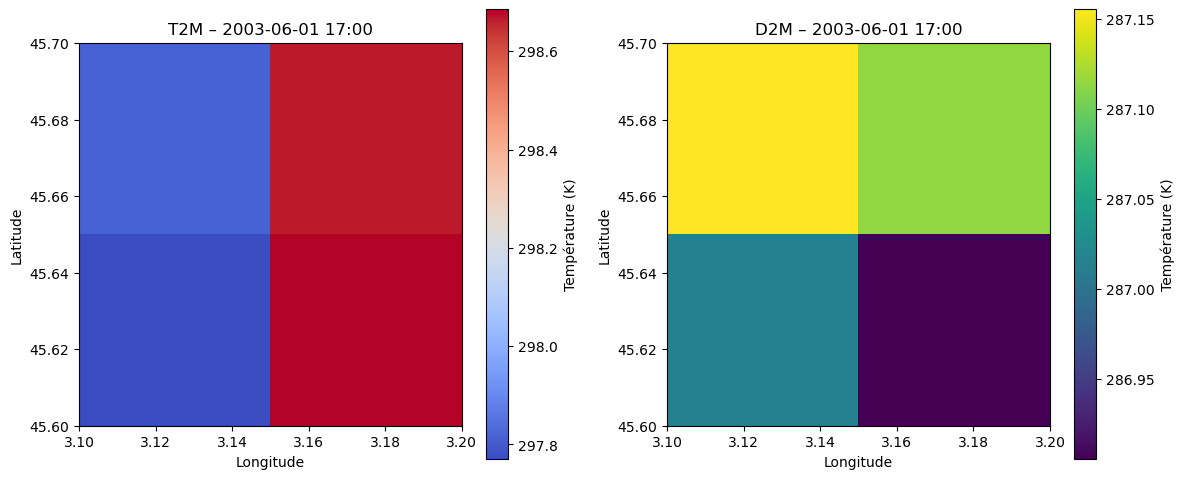

In [12]:
import matplotlib.pyplot as plt

# Choix du pas de temps (en index)
time_index = 1000 # pas de temps = 1 heure et ça commence le 1 janvier 2000 à 1h00

lon = ds_mnth.longitude
lat = ds_mnth.latitude

# Formatage de la date : année-mois-jour heure:minute
date_str = ds_mnth.valid_time[time_index].dt.strftime("%Y-%m-%d %H:%M").item()

plt.figure(figsize=(12,5))

# --- T2M ---
plt.subplot(1,2,1)
plt.imshow(
    ds_mnth.t2m.isel(valid_time=time_index),
    cmap="coolwarm",
    origin="upper",
    extent=[float(lon.min()), float(lon.max()), float(lat.min()), float(lat.max())]
)
plt.title(f"T2M – {date_str}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Température (K)")

# --- D2M ---
plt.subplot(1,2,2)
plt.imshow(
    ds_mnth.d2m.isel(valid_time=time_index),
    cmap="viridis",
    origin="upper",
    extent=[float(lon.min()), float(lon.max()), float(lat.min()), float(lat.max())]
)
plt.title(f"D2M – {date_str}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Température (K)")

plt.tight_layout()
plt.show()


In [13]:
print(ds_mnth.valid_time)

<xarray.DataArray 'valid_time' (valid_time: 2304)> Size: 18kB
array(['2000-01-01T01:00:00.000000000', '2000-01-01T02:00:00.000000000',
       '2000-01-01T03:00:00.000000000', ..., '2007-12-01T22:00:00.000000000',
       '2007-12-01T23:00:00.000000000', '2007-12-02T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 18kB 2000-01-01T01:00:00 ... 2007...
    expver      (valid_time) <U4 37kB ...
Attributes:
    long_name:      time
    standard_name:  time


In [14]:
print(ds_moda.valid_time)

<xarray.DataArray 'valid_time' (valid_time: 96)> Size: 768B
array(['2000-01-01T00:00:00.000000000', '2000-02-01T00:00:00.000000000',
       '2000-03-01T00:00:00.000000000', '2000-04-01T00:00:00.000000000',
       '2000-05-01T00:00:00.000000000', '2000-06-01T00:00:00.000000000',
       '2000-07-01T00:00:00.000000000', '2000-08-01T00:00:00.000000000',
       '2000-09-01T00:00:00.000000000', '2000-10-01T00:00:00.000000000',
       '2000-11-01T00:00:00.000000000', '2000-12-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2001-02-01T00:00:00.000000000',
       '2001-03-01T00:00:00.000000000', '2001-04-01T00:00:00.000000000',
       '2001-05-01T00:00:00.000000000', '2001-06-01T00:00:00.000000000',
       '2001-07-01T00:00:00.000000000', '2001-08-01T00:00:00.000000000',
       '2001-09-01T00:00:00.000000000', '2001-10-01T00:00:00.000000000',
       '2001-11-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2002-02-01T00:00:00.000